In [1]:
import spotipy #Spotify Web API wrapper for python
from spotipy.oauth2 import SpotifyClientCredentials #Auth
import pandas as pd #Dataframe
import time #Pause execution of loops
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

In [2]:
client_id = "11ff7112cf044de8bb8626fb93505bbc"
client_secret = "551ab8978f3d4ea5a1c57ce762373ae7"

In [3]:
auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret) #Set up Auth for client

In [4]:
sp = spotipy.Spotify(auth_manager = auth_manager)

track_uri = 'spotify:track:5YJtMNWKe55yr49cyJgxva' #Cascada - Everytime we touch
# Track URI :'spotify:track:1SFA5zEVOsLhEg7ynbvQFT' #Illenium Love me a little

In [5]:
track_info = sp.track(track_uri)
track_features = sp.audio_features(track_uri)
track_features

[{'danceability': 0.633,
  'energy': 0.976,
  'key': 8,
  'loudness': -5.362,
  'mode': 1,
  'speechiness': 0.0519,
  'acousticness': 0.00281,
  'instrumentalness': 1.29e-05,
  'liveness': 0.382,
  'valence': 0.493,
  'tempo': 142.027,
  'type': 'audio_features',
  'id': '5YJtMNWKe55yr49cyJgxva',
  'uri': 'spotify:track:5YJtMNWKe55yr49cyJgxva',
  'track_href': 'https://api.spotify.com/v1/tracks/5YJtMNWKe55yr49cyJgxva',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5YJtMNWKe55yr49cyJgxva',
  'duration_ms': 197124,
  'time_signature': 4}]

In [6]:
#Track Info
name = track_info['name']
album = track_info['album']['name']
artist = track_info['album']['artists'][0]['name']
release_date = track_info['album']['release_date']
length = track_info['duration_ms']
popularity = track_info['popularity']

#Track Features
acousticness = track_features[0]['acousticness']
danceability = track_features[0]['danceability']
energy = track_features[0]['energy']
instrumentalness = track_features[0]['instrumentalness']
liveness = track_features[0]['liveness']
loudness = track_features[0]['loudness']
speechiness = track_features[0]['speechiness']
tempo = track_features[0]['tempo']
time_signature = track_features[0]['time_signature']

track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness,
         liveness, loudness, speechiness, tempo, time_signature]
track_columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy',
                 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']

In [7]:
df = pd.DataFrame(track).T.values.tolist() #Transpose Dataframe to list

In [8]:
track_analysis = sp.audio_analysis(track_uri)
track_analysis

{'meta': {'analyzer_version': '4.0.0',
  'platform': 'Linux',
  'detailed_status': 'OK',
  'status_code': 0,
  'timestamp': 1503230362,
  'analysis_time': 7.17656,
  'input_process': 'libvorbisfile L+R 44100->22050'},
 'track': {'num_samples': 4346591,
  'duration': 197.12431,
  'sample_md5': '',
  'offset_seconds': 0,
  'window_seconds': 0,
  'analysis_sample_rate': 22050,
  'analysis_channels': 1,
  'end_of_fade_in': 2.39746,
  'start_of_fade_out': 191.95357,
  'loudness': -5.362,
  'tempo': 142.027,
  'tempo_confidence': 0.763,
  'time_signature': 4,
  'time_signature_confidence': 1.0,
  'key': 8,
  'key_confidence': 0.498,
  'mode': 1,
  'mode_confidence': 0.457,
  'codestring': 'eJxVmtlhJDcMRFOZEHgf-Sfm94ojrewPr8juYRMgjiqAc5Vx1h7tUz5zz7rWvecz6sro1N4Hf61PO2X2Om77rN0-7fJXP7V9zuXN1Xobe-xPLed8-q57zDLupzbWuXeOVddcn9r5QS39lNr3HZ_KS3zqllN9ea3xOb1OXr79U-9hyFfX7n1-Wh0ZrjorT1vnp-3M0kbZ9dM2L-95-j371k8fbXz6nHXeXutnlM53zy23MPUZYxx-e-etC-nGGoW5edtGF59ZW_nsVs9E7MjOcPdZ5mCTq5XDNtoqez9d8HS1inru_qz

In [9]:
track_meta = track_analysis['meta']
track_bars = track_analysis['bars']
track_beats = track_analysis['beats']
track_tatums = track_analysis['tatums']
track_segments = track_analysis['segments']

track_data = track_analysis['segments'][0]['pitches'][0] #extract one data point from a list
pitch=[]
for elem in track_segments:
    pitch.append(track_segments[0]['pitches'])
pitch

[[0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  0.236,
  0.349,
  0.385,
  0.588,
  1.0,
  0.777,
  0.968],
 [0.694,
  0.465,
  0.36,
  0.329,
  0.291,
  

In [10]:
track_bars_df = pd.DataFrame(track_bars)
track_beats_df = pd.DataFrame(track_beats)
track_tatums_df = pd.DataFrame(track_tatums)
track_segments_df = pd.DataFrame(track_segments)

track_beats_df['exists'] = 1
track_bars_df['exists'] = 1.5
track_tatums_df['exists'] = 0.5

track_segments_df


,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,pitches,timbre
0,0.00000,0.31315,0.000,-60.000,0.28444,-57.131,0.0,"[0.694, 0.465, 0.36, 0.329, 0.291, 0.236, 0.34...","[0.279, 168.898, 17.526, -34.1, 57.523, -53.44..."
1,0.31315,0.07601,0.537,-57.061,0.04676,-54.227,0.0,"[0.888, 0.469, 0.302, 0.363, 0.321, 0.319, 0.3...","[5.83, 135.612, 113.89, -4.599, 57.052, -31.03..."
2,0.38916,0.14481,0.462,-53.271,0.10017,-48.329,0.0,"[1.0, 0.5, 0.252, 0.161, 0.224, 0.137, 0.219, ...","[9.727, 122.882, 160.119, 1.334, 52.587, -35.1..."
3,0.53397,0.18000,0.568,-47.842,0.13955,-40.834,0.0,"[1.0, 0.903, 0.288, 0.256, 0.253, 0.24, 0.401,...","[15.66, 112.294, 190.177, -8.665, 41.328, -19...."
4,0.71397,0.18014,0.487,-41.150,0.13854,-35.549,0.0,"[1.0, 0.605, 0.21, 0.246, 0.171, 0.187, 0.273,...","[21.818, 102.611, 186.076, 11.213, 48.051, -24..."
...,...,...,...,...,...,...,...,...,...
722,192.11620,0.63855,0.245,-6.509,0.00723,-2.843,0.0,"[0.419, 0.38, 0.764, 1.0, 0.547, 0.307, 0.178,...","[53.744, 39.016, -11.803, -5.111, 17.742, -68...."
723,192.75475,0.42399,0.180,-11.102,0.00719,-6.831,0.0,"[0.78, 0.578, 0.598, 0.562, 0.311, 0.261, 0.26...","[51.374, 84.253, -43.855, -41.393, 9.883, -57...."
724,193.17873,0.41764,0.053,-11.725,0.00558,-7.567,0.0,"[0.762, 0.572, 0.597, 0.551, 0.308, 0.262, 0.2...","[50.914, 89.815, -53.382, -49.113, 11.056, -52..."
725,193.59637,0.21052,0.248,-11.885,0.00837,-6.932,0.0,"[0.208, 0.296, 0.689, 1.0, 0.511, 0.105, 0.06,...","[51.163, 82.927, -58.918, -48.151, 12.538, -58..."


In [11]:
#Splits the list of PITCHES in 1 column into separate columns
track_segments_df = pd.concat([track_segments_df, track_segments_df['pitches'].apply(pd.Series)], axis=1).drop('pitches', axis=1)
# rename the columns
new_col_names = {i: f'pitch{i+1}' for i in range(len(track_segments_df.columns))}
track_segments_df.rename(columns=new_col_names, inplace=True)
track_segments_df

,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,timbre,pitch1,pitch2,pitch3,pitch4,pitch5,pitch6,pitch7,pitch8,pitch9,pitch10,pitch11,pitch12
0,0.00000,0.31315,0.000,-60.000,0.28444,-57.131,0.0,"[0.279, 168.898, 17.526, -34.1, 57.523, -53.44...",0.694,0.465,0.360,0.329,0.291,0.236,0.349,0.385,0.588,1.000,0.777,0.968
1,0.31315,0.07601,0.537,-57.061,0.04676,-54.227,0.0,"[5.83, 135.612, 113.89, -4.599, 57.052, -31.03...",0.888,0.469,0.302,0.363,0.321,0.319,0.397,0.401,0.590,0.913,0.876,1.000
2,0.38916,0.14481,0.462,-53.271,0.10017,-48.329,0.0,"[9.727, 122.882, 160.119, 1.334, 52.587, -35.1...",1.000,0.500,0.252,0.161,0.224,0.137,0.219,0.228,0.404,0.558,0.397,0.430
3,0.53397,0.18000,0.568,-47.842,0.13955,-40.834,0.0,"[15.66, 112.294, 190.177, -8.665, 41.328, -19....",1.000,0.903,0.288,0.256,0.253,0.240,0.401,0.438,0.588,0.829,0.715,0.788
4,0.71397,0.18014,0.487,-41.150,0.13854,-35.549,0.0,"[21.818, 102.611, 186.076, 11.213, 48.051, -24...",1.000,0.605,0.210,0.246,0.171,0.187,0.273,0.270,0.404,0.486,0.637,0.651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,192.11620,0.63855,0.245,-6.509,0.00723,-2.843,0.0,"[53.744, 39.016, -11.803, -5.111, 17.742, -68....",0.419,0.380,0.764,1.000,0.547,0.307,0.178,0.284,0.244,0.316,0.833,0.775
723,192.75475,0.42399,0.180,-11.102,0.00719,-6.831,0.0,"[51.374, 84.253, -43.855, -41.393, 9.883, -57....",0.780,0.578,0.598,0.562,0.311,0.261,0.262,0.347,0.472,0.753,1.000,0.985
724,193.17873,0.41764,0.053,-11.725,0.00558,-7.567,0.0,"[50.914, 89.815, -53.382, -49.113, 11.056, -52...",0.762,0.572,0.597,0.551,0.308,0.262,0.263,0.345,0.471,0.749,1.000,0.982
725,193.59637,0.21052,0.248,-11.885,0.00837,-6.932,0.0,"[51.163, 82.927, -58.918, -48.151, 12.538, -58...",0.208,0.296,0.689,1.000,0.511,0.105,0.060,0.061,0.044,0.100,0.152,0.162


In [12]:
#Splits the list of TIMBRES in 1 column into separate columns
track_segments_df = pd.concat([track_segments_df, track_segments_df['timbre'].apply(pd.Series)], axis=1).drop('timbre', axis=1)
# rename the columns
new_col_names = {i: f'timbre{i+1}' for i in range(len(track_segments_df.columns))}
track_segments_df.rename(columns=new_col_names, inplace=True)

track_segments_df

,start,duration,confidence,loudness_start,loudness_max_time,loudness_max,loudness_end,pitch1,pitch2,pitch3,...,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,timbre10,timbre11,timbre12
0,0.00000,0.31315,0.000,-60.000,0.28444,-57.131,0.0,0.694,0.465,0.360,...,17.526,-34.100,57.523,-53.449,21.756,-1.405,-28.561,-1.218,-2.707,-8.886
1,0.31315,0.07601,0.537,-57.061,0.04676,-54.227,0.0,0.888,0.469,0.302,...,113.890,-4.599,57.052,-31.033,76.177,8.963,-35.820,6.101,-4.666,-10.235
2,0.38916,0.14481,0.462,-53.271,0.10017,-48.329,0.0,1.000,0.500,0.252,...,160.119,1.334,52.587,-35.108,72.592,-0.850,-24.262,8.881,-5.993,-6.979
3,0.53397,0.18000,0.568,-47.842,0.13955,-40.834,0.0,1.000,0.903,0.288,...,190.177,-8.665,41.328,-19.461,47.144,8.854,-24.518,2.591,10.382,4.780
4,0.71397,0.18014,0.487,-41.150,0.13854,-35.549,0.0,1.000,0.605,0.210,...,186.076,11.213,48.051,-24.362,52.989,2.903,-10.912,8.519,3.527,14.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,192.11620,0.63855,0.245,-6.509,0.00723,-2.843,0.0,0.419,0.380,0.764,...,-11.803,-5.111,17.742,-68.084,1.602,36.089,-32.629,-11.507,-15.114,17.693
723,192.75475,0.42399,0.180,-11.102,0.00719,-6.831,0.0,0.780,0.578,0.598,...,-43.855,-41.393,9.883,-57.402,-29.601,9.573,-26.923,-11.961,-1.794,1.669
724,193.17873,0.41764,0.053,-11.725,0.00558,-7.567,0.0,0.762,0.572,0.597,...,-53.382,-49.113,11.056,-52.537,-38.418,7.245,-8.316,-10.293,-5.969,5.584
725,193.59637,0.21052,0.248,-11.885,0.00837,-6.932,0.0,0.208,0.296,0.689,...,-58.918,-48.151,12.538,-58.323,-32.867,1.075,-1.743,-3.778,-9.899,6.176


In [13]:
#Extra all the PITCHES from the main data set
pitch_df=track_segments_df[["start","pitch1","pitch2","pitch3","pitch4","pitch5","pitch6","pitch7","pitch8","pitch9","pitch10","pitch11","pitch12"]]
pitch_df

,start,pitch1,pitch2,pitch3,pitch4,pitch5,pitch6,pitch7,pitch8,pitch9,pitch10,pitch11,pitch12
0,0.00000,0.694,0.465,0.360,0.329,0.291,0.236,0.349,0.385,0.588,1.000,0.777,0.968
1,0.31315,0.888,0.469,0.302,0.363,0.321,0.319,0.397,0.401,0.590,0.913,0.876,1.000
2,0.38916,1.000,0.500,0.252,0.161,0.224,0.137,0.219,0.228,0.404,0.558,0.397,0.430
3,0.53397,1.000,0.903,0.288,0.256,0.253,0.240,0.401,0.438,0.588,0.829,0.715,0.788
4,0.71397,1.000,0.605,0.210,0.246,0.171,0.187,0.273,0.270,0.404,0.486,0.637,0.651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,192.11620,0.419,0.380,0.764,1.000,0.547,0.307,0.178,0.284,0.244,0.316,0.833,0.775
723,192.75475,0.780,0.578,0.598,0.562,0.311,0.261,0.262,0.347,0.472,0.753,1.000,0.985
724,193.17873,0.762,0.572,0.597,0.551,0.308,0.262,0.263,0.345,0.471,0.749,1.000,0.982
725,193.59637,0.208,0.296,0.689,1.000,0.511,0.105,0.060,0.061,0.044,0.100,0.152,0.162


In [14]:
#Extra all the TIMBRE from the main data set
#original line of code
# timbre_df=track_segments_df[["start","timbre1","timbre2","timbre3","timbre4","timbre5","timbre6","timbre7","timbre8","timbre9","timbre10","timbre11","timbre12"]]

timbre_df=track_segments_df[["timbre1","timbre2","timbre3","timbre4","timbre5","timbre6","timbre7","timbre8","timbre9","timbre10","timbre11","timbre12"]]
timbre_df

,timbre1,timbre2,timbre3,timbre4,timbre5,timbre6,timbre7,timbre8,timbre9,timbre10,timbre11,timbre12
0,0.279,168.898,17.526,-34.100,57.523,-53.449,21.756,-1.405,-28.561,-1.218,-2.707,-8.886
1,5.830,135.612,113.890,-4.599,57.052,-31.033,76.177,8.963,-35.820,6.101,-4.666,-10.235
2,9.727,122.882,160.119,1.334,52.587,-35.108,72.592,-0.850,-24.262,8.881,-5.993,-6.979
3,15.660,112.294,190.177,-8.665,41.328,-19.461,47.144,8.854,-24.518,2.591,10.382,4.780
4,21.818,102.611,186.076,11.213,48.051,-24.362,52.989,2.903,-10.912,8.519,3.527,14.813
...,...,...,...,...,...,...,...,...,...,...,...,...
722,53.744,39.016,-11.803,-5.111,17.742,-68.084,1.602,36.089,-32.629,-11.507,-15.114,17.693
723,51.374,84.253,-43.855,-41.393,9.883,-57.402,-29.601,9.573,-26.923,-11.961,-1.794,1.669
724,50.914,89.815,-53.382,-49.113,11.056,-52.537,-38.418,7.245,-8.316,-10.293,-5.969,5.584
725,51.163,82.927,-58.918,-48.151,12.538,-58.323,-32.867,1.075,-1.743,-3.778,-9.899,6.176


In [15]:
#Standardize the features so bigger values do not outweigh other values

X =timbre_df.values
print(X.shape)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

(727, 12)


In [16]:
#Choose correct nuber of dimensions for PCA, this case 12, 12 for 12-D timbre.

from sklearn.decomposition import PCA

pca_13 = PCA(n_components=12, random_state=2022)
pca_13.fit(X_scaled)
X_pca_13 = pca_13.transform(X_scaled)

print("Variance explained by all 13 princinipal components = ",sum(pca_13.explained_variance_ratio_*100))

Variance explained by all 13 princinipal components =  100.00000000000003


Text(0, 0.5, 'Explained varaince')

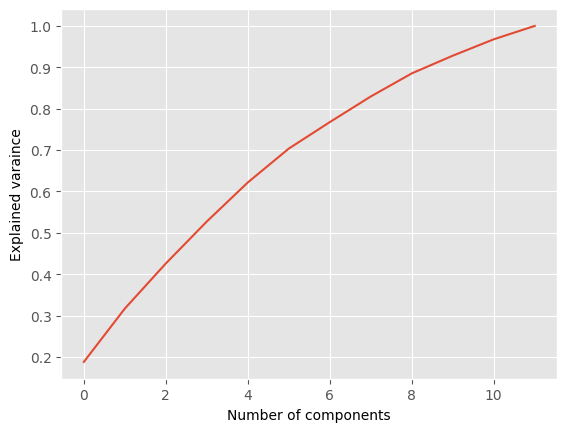

In [18]:
#Plot Data
plt.figure()
plt.plot(np.cumsum(pca_13.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained varaince')
